# Opening serial files and converting to csv

In [13]:
# Opening serial files and converting to csv

# OS
import os
# Regex
import re
# Typing
from typing import List

# Open serial files (.txt)
files = list(filter(lambda x: x.endswith('.txt'), os.listdir()))

def parse_column_names(line: str) -> str | None:
	# Create pattern to match the column names
	pattern = re.compile(r'\b(\w+):')

	# Match the pattern
	match = pattern.findall(line)

	if len(match) != 8:
		return None
	
	return ",".join(match)


#
# Parse the file
#
def parse_file(file: List[str]) -> List[str]:
	prefix = None
	csv_lines = []
	for line in file:
		# Try to get the column names
		if not prefix:
			# Get the column names
			parsed_prefix = parse_column_names(line)
			# If exists, set the prefix
			if parsed_prefix:
				prefix = parsed_prefix
		
		# Try to get the values
		parsed_line = parse_line(line)
		
		# If line is on the format append to csv lines
		if parsed_line:
			csv_lines.append(parsed_line)
	
	# Add the prefix to the begin of the file
	csv_lines.insert(0, prefix)

	return csv_lines




#
# Parse a line of the file getting the values in a csv like format
#
def parse_line(line: str) -> str | None:
	if not line.find(","):
		return None

	pattern = re.compile(r'(\d+\.\d+|\d+)')
	match = pattern.findall(line)

	if len(match) != 8:
		return None
	
	return ",".join(match)


# Convert to csv
for file in files:
	with open(file, 'r') as f:
		# Read the file
		lines = f.readlines()
		# Parse the file
		csv_file = parse_file(lines)
		# Write to csv 
		with open(file[:-4] + ".csv", 'w') as csv:
			csv.write("\n".join(csv_file))




In [15]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


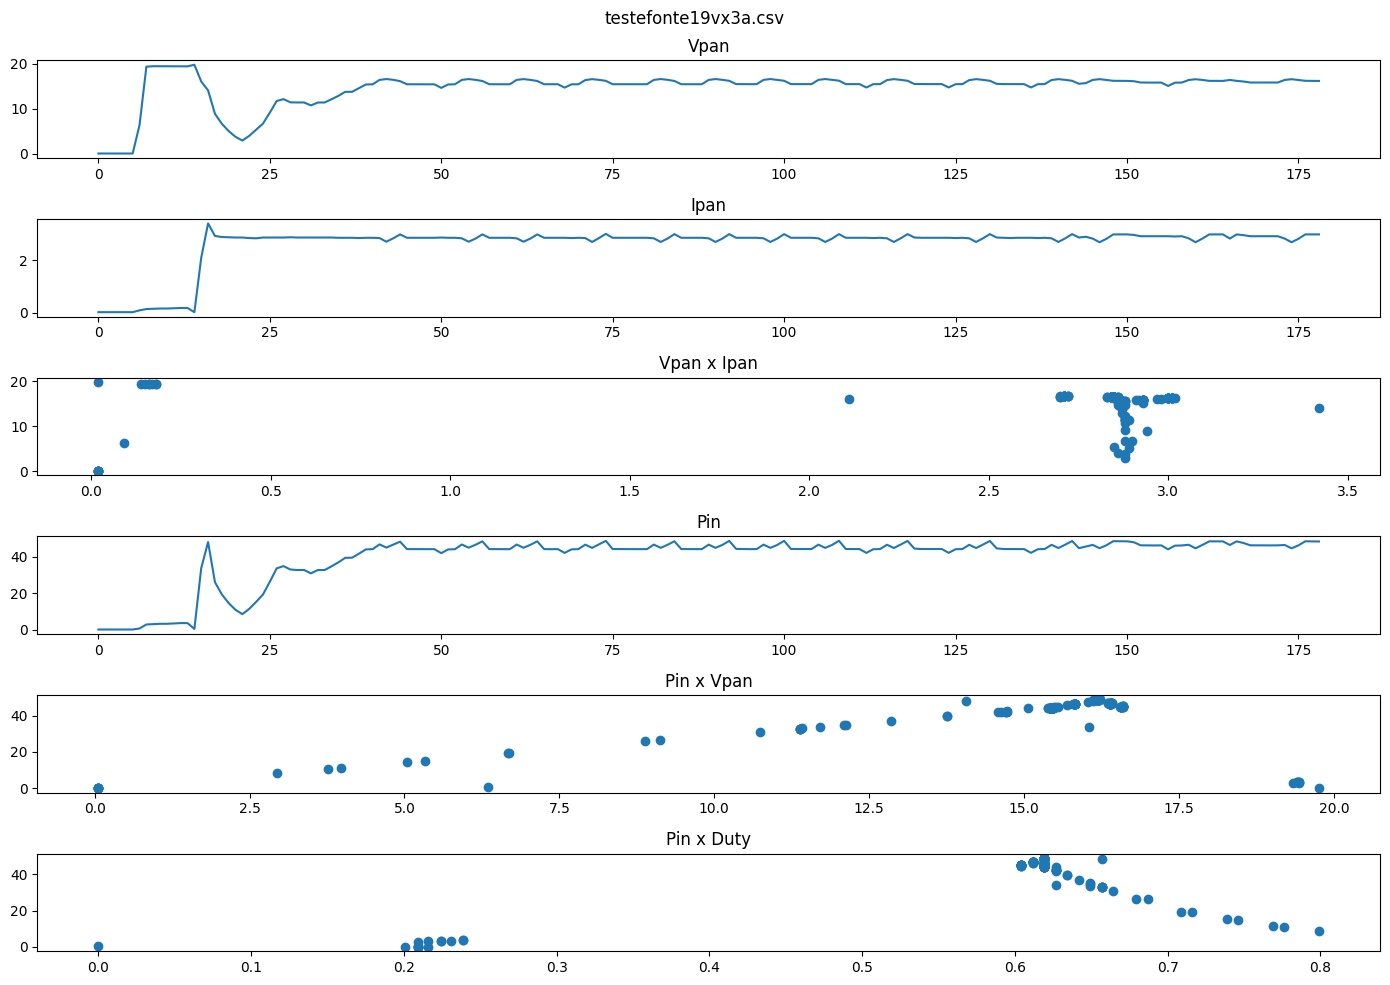

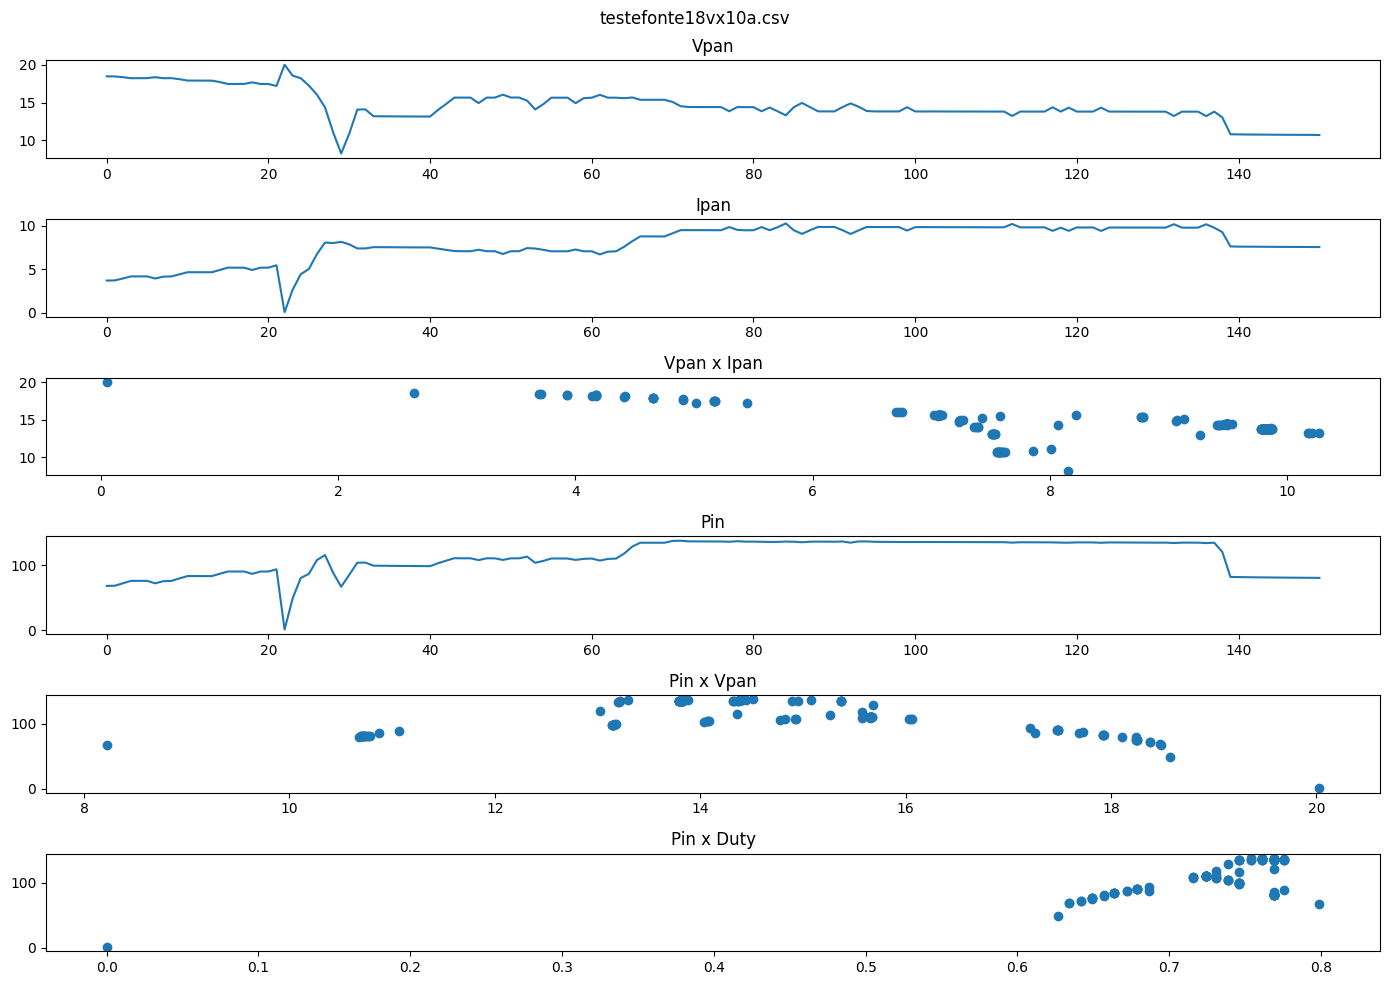

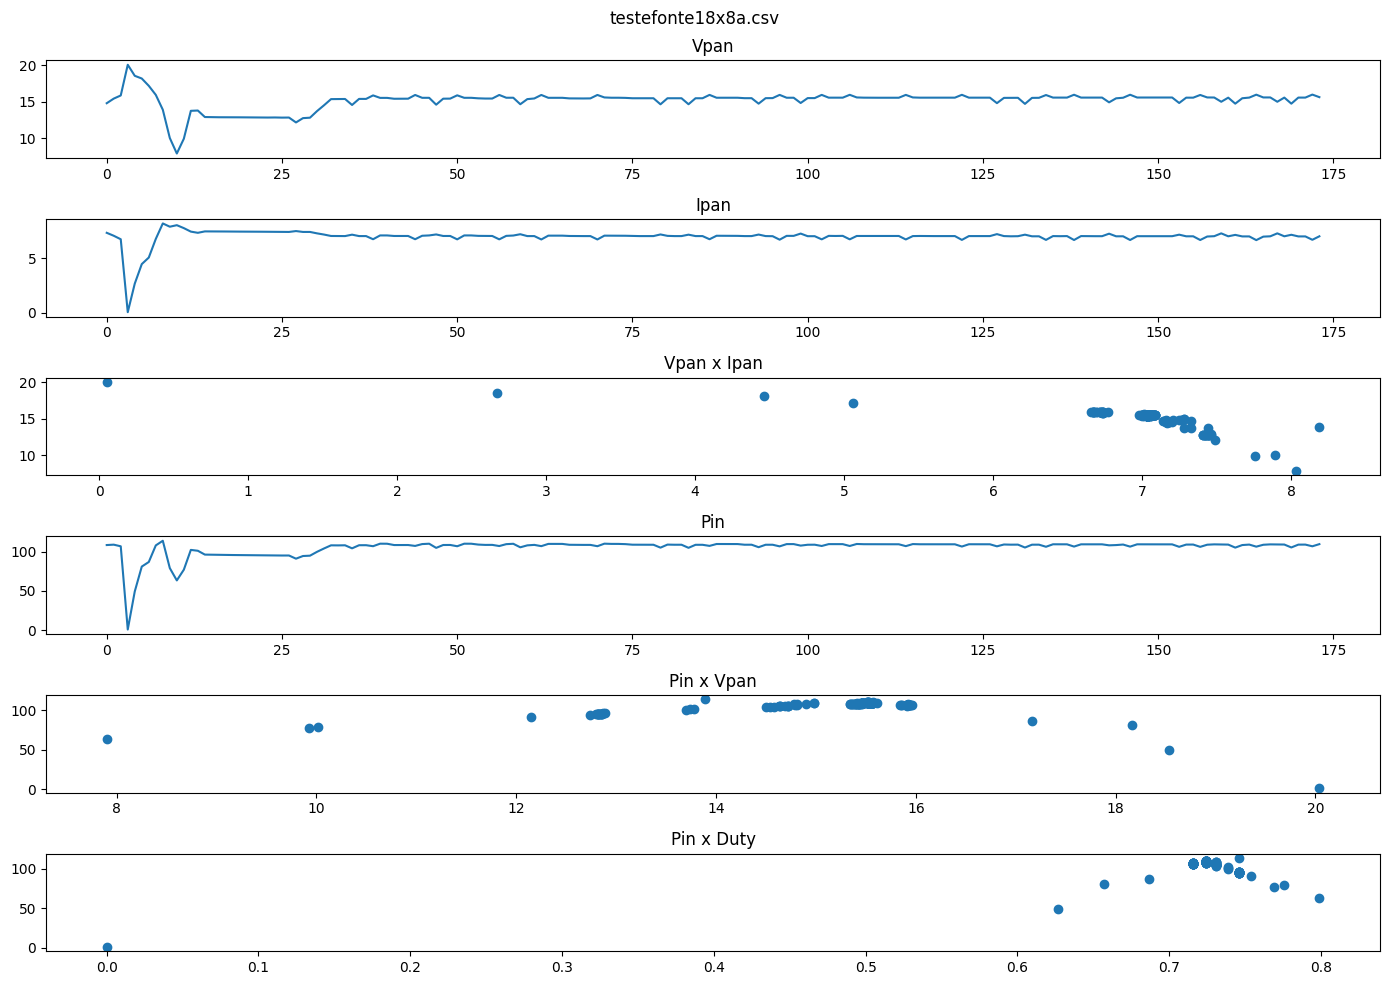

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def print_log_csv(file_name: str) -> None:
	# Read the csv file
	df = pd.read_csv(file_name)
	
	# Plot vpan, ipan
	fig, axs = plt.subplots(6, 1, figsize=(14, 10))

	# Set the title of the figure
	fig.suptitle(file_name)

	axs[0].plot(df.index, df['Vpan'])
	axs[0].set_title('Vpan')
	
	axs[1].plot(df.index, df['Ipan'])
	axs[1].set_title('Ipan')


	# Plot Vpan x Ipan
	axs[2].scatter(df["Ipan"], df['Vpan'], label='Vpan x Ipan')
	axs[2].set_title('Vpan x Ipan')

	# Plot Pin
	axs[3].plot(df.index, df['Pin'])
	axs[3].set_title('Pin')

	# Plot Pin x Vpan
	axs[4].scatter(df['Vpan'], df['Pin'])
	axs[4].set_title('Pin x Vpan')

	# Plot Pin x Duty
	axs[5].scatter(df['Duty'], df['Pin'])
	axs[5].set_title('Pin x Duty')

	# Show the plot
	plt.tight_layout()
	plt.show()

for file in files:
	print_log_csv(file[:-4] + ".csv")






	





